## PREDICTION BY LOGISTIC REGRESSION

In [1]:
# Logistic Regression
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import seaborn as sb
%matplotlib inline

In [3]:
db=pd.read_csv('Groundwater.csv')


In [4]:
db.head()

,States,Recharge from rainfallMonsoon season,Recharge from other sources,Recharge from rainfallNon-monsoon season,Recharge from other sources.1,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Projected demand for domestic and industrial uses upto 2025,Groundwater availability for future irrigation use,Situation
0,Andhra Pradesh,15.1,6.5000,5.5,6.7000,33.8,3.1,30.8,12.600,1.500,14.200,2.70,15.9,EXCESS
1,Arunachal Pradesh,3.4,0.0003,1.0,0.0004,4.5,0.5,4.0,0.002,0.001,0.003,0.01,4.0,SEMICRITICAL
2,Assam,19.0,2.2000,8.6,0.6000,30.4,2.5,27.8,5.300,0.700,6.000,1.00,21.5,EXCESS
3,Bihar,18.9,3.9000,3.4,2.4000,28.6,2.4,26.2,9.800,1.600,11.400,2.60,13.9,MODERATED
4,Chhattisgarh,9.9,0.6000,0.9,0.9000,12.2,0.6,11.6,3.100,0.500,3.600,0.60,7.9,MODERATED


## NUMBER OF STATES REPRESENTATION 

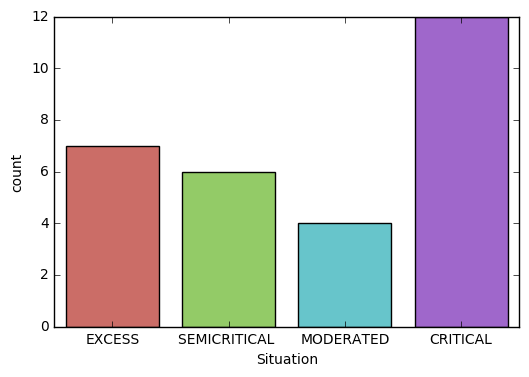

In [5]:
sb.countplot(x='Situation',data=db, palette='hls')

# Test the Data Through LabelEncoder

In [6]:
X=db.iloc[:,[5,6,7,10,11,12]].values
Y=db.iloc[:, 13].values

In [7]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

# ACCURACY

In [13]:
classifier.score(X_test, Y_test)

0.625

In [14]:
classifier.score(X_train, Y_train)

0.7142857142857143

#### As we can see that dataset didn't aquires the diserted accuracy. And the Overfitting problem is aries so now we are Use Dummy Variable Trap to Over come the problem.

# USE OF DUMMY VARIABLE

In [15]:
Availabilty = pd.get_dummies(db['Situation'],drop_first=True)
Availabilty.head()

,EXCESS,MODERATED,SEMICRITICAL
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [16]:
db.drop(['Situation'],axis=1,inplace=True)
db.head()

,States,Recharge from rainfallMonsoon season,Recharge from other sources,Recharge from rainfallNon-monsoon season,Recharge from other sources.1,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Projected demand for domestic and industrial uses upto 2025,Groundwater availability for future irrigation use
0,Andhra Pradesh,15.1,6.5000,5.5,6.7000,33.8,3.1,30.8,12.600,1.500,14.200,2.70,15.9
1,Arunachal Pradesh,3.4,0.0003,1.0,0.0004,4.5,0.5,4.0,0.002,0.001,0.003,0.01,4.0
2,Assam,19.0,2.2000,8.6,0.6000,30.4,2.5,27.8,5.300,0.700,6.000,1.00,21.5
3,Bihar,18.9,3.9000,3.4,2.4000,28.6,2.4,26.2,9.800,1.600,11.400,2.60,13.9
4,Chhattisgarh,9.9,0.6000,0.9,0.9000,12.2,0.6,11.6,3.100,0.500,3.600,0.60,7.9


In [17]:
new_data = pd.concat([db,Availabilty],axis=1)
new_data.head()

,States,Recharge from rainfallMonsoon season,Recharge from other sources,Recharge from rainfallNon-monsoon season,Recharge from other sources.1,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Projected demand for domestic and industrial uses upto 2025,Groundwater availability for future irrigation use,EXCESS,MODERATED,SEMICRITICAL
0,Andhra Pradesh,15.1,6.5000,5.5,6.7000,33.8,3.1,30.8,12.600,1.500,14.200,2.70,15.9,1.0,0.0,0.0
1,Arunachal Pradesh,3.4,0.0003,1.0,0.0004,4.5,0.5,4.0,0.002,0.001,0.003,0.01,4.0,0.0,0.0,1.0
2,Assam,19.0,2.2000,8.6,0.6000,30.4,2.5,27.8,5.300,0.700,6.000,1.00,21.5,1.0,0.0,0.0
3,Bihar,18.9,3.9000,3.4,2.4000,28.6,2.4,26.2,9.800,1.600,11.400,2.60,13.9,0.0,1.0,0.0
4,Chhattisgarh,9.9,0.6000,0.9,0.9000,12.2,0.6,11.6,3.100,0.500,3.600,0.60,7.9,0.0,1.0,0.0


In [18]:
X=new_data.iloc[:,[5,6,7,10,11,12]].values
Y=new_data.iloc[:, 13].values

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.55, random_state = 0)

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=25)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=25, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [24]:
cm

array([[12,  0],
       [ 1,  3]])

# ACCURACY

In [25]:
test=classifier.score(X_test, Y_test)

In [26]:
test

0.9375

In [27]:
train=classifier.score(X_train, Y_train)

In [28]:
train

0.92307692307692313

In [29]:
new_data.describe()

,Recharge from rainfallMonsoon season,Recharge from other sources,Recharge from rainfallNon-monsoon season,Recharge from other sources.1,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Projected demand for domestic and industrial uses upto 2025,Groundwater availability for future irrigation use,EXCESS,MODERATED,SEMICRITICAL
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,8.490690,2.328976,1.563793,2.474152,14.846207,1.210483,13.644483,7.631724,0.758021,8.392048,1.063483,5.292414,0.241379,0.137931,0.206897
std,9.909697,3.420270,2.139700,3.733489,16.931169,1.448532,15.538660,10.802838,0.798408,11.440317,1.172055,7.782267,0.435494,0.350931,0.412251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000200,0.000400,0.001000,-14.600000,0.000000,0.000000,0.000000
25%,1.000000,0.010000,0.200000,0.100000,1.200000,0.100000,1.100000,0.100000,0.030000,0.200000,0.100000,0.400000,0.000000,0.000000,0.000000
50%,4.800000,0.700000,0.800000,0.900000,10.500000,0.600000,9.800000,3.100000,0.700000,3.600000,0.800000,3.000000,0.000000,0.000000,0.000000
75%,12.200000,2.700000,1.900000,3.500000,22.900000,2.000000,20.700000,11.900000,1.100000,13.000000,1.700000,11.900000,0.000000,0.000000,0.000000
max,40.800000,11.400000,8.600000,17.700000,75.300000,6.700000,68.600000,46.000000,3.500000,49.500000,5.400000,21.500000,1.000000,1.000000,1.000000


# GRAPH,PIE CHARTS PLOT

In [30]:
import seaborn as sb
%matplotlib inline

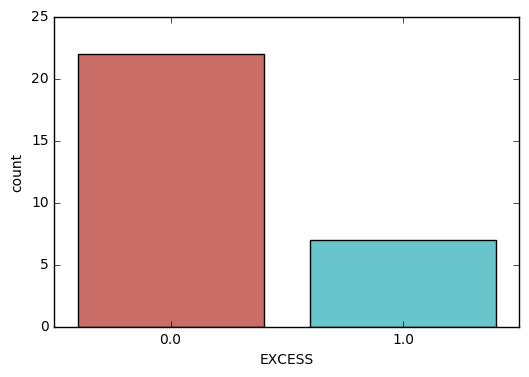

In [31]:
sb.countplot(x='EXCESS',data=new_data, palette='hls')

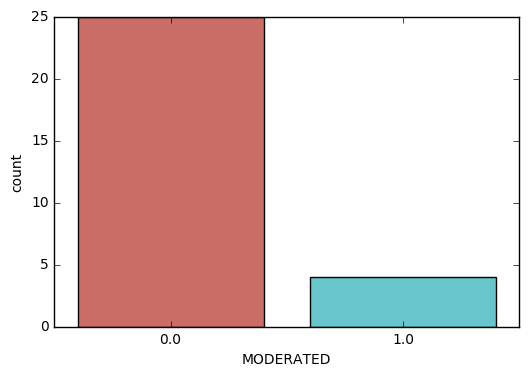

In [32]:
sb.countplot(x='MODERATED',data=new_data, palette='hls')

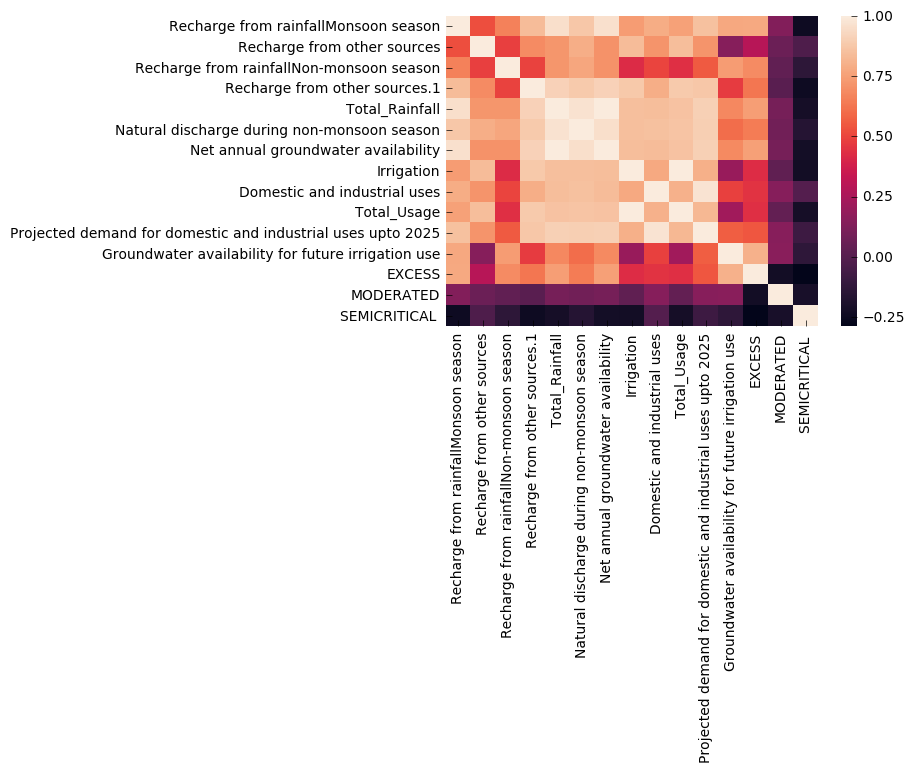

In [33]:
sb.heatmap(new_data.corr())

## PIECHART REPRESENTATION FOR NET ANNUM GROUND WATER

In [34]:
labels='Total Rainfall','Net Annual GroundWater','Total Use','Future Available','Projected demand for domestic and industrial uses upto 2025','Natural discharge during non-monsoon season'
sizes=[14.84,13.64,8.39,5.29,1.063483,1.210483]
cols = ['c','m','r','b','g','y']

([<matplotlib.patches.Wedge at 0x22b3f502048>,
  <matplotlib.text.Text at 0x22b3f3e3fd0>])

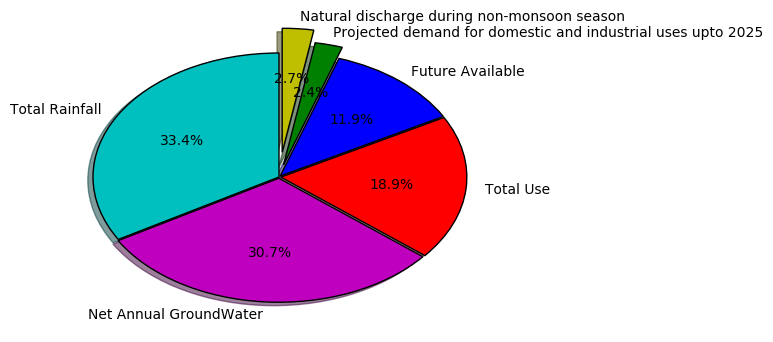

In [35]:
plt.pie(sizes,labels=labels,colors=cols,startangle=90,shadow=True,explode=(0,0.01,0.01,0.01,0.1,0.2),autopct='%1.1f%%')



## SCATTER PLOTS

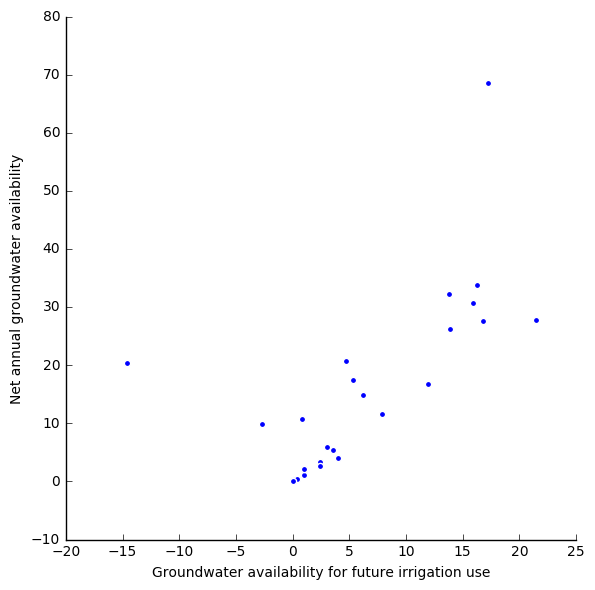

In [36]:
sb.pairplot(new_data, x_vars='Groundwater availability for future irrigation use', y_vars='Net annual groundwater availability', kind='scatter', diag_kind='hist',size=6.0)

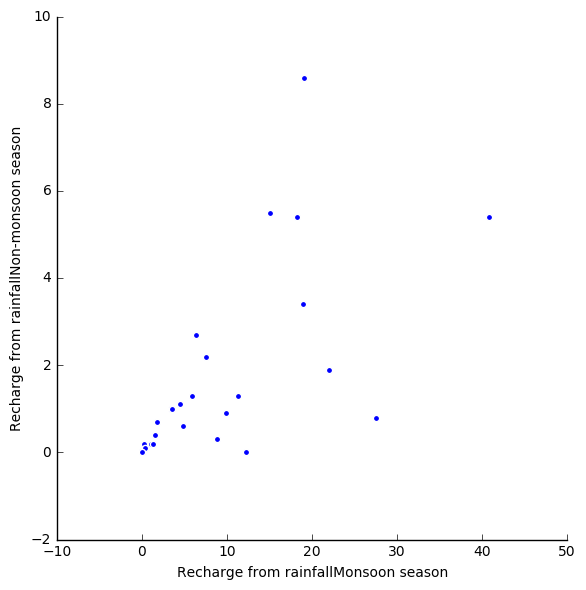

In [37]:
sb.pairplot(new_data, x_vars='Recharge from rainfallMonsoon season', y_vars='Recharge from rainfallNon-monsoon season', kind='scatter', diag_kind='hist',size=6.0)

## PIECHART REPRESENT THE SITUATION IN % 

In [38]:
label='EXCESS','MODERATED','SEMI-CRITICAL','CRITICAL'
sizes=[7,4,6,6]
cols = ['c','m','r','b']

([<matplotlib.patches.Wedge at 0x22b3f6255f8>,
  <matplotlib.text.Text at 0x22b3f648470>])

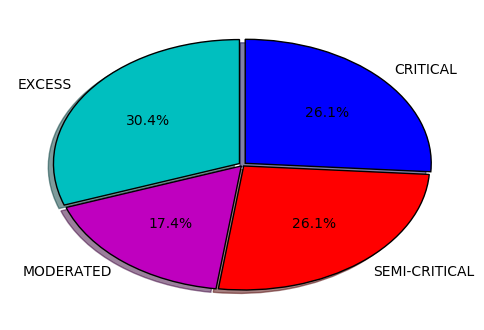

In [39]:
plt.pie(sizes,labels=label,colors=cols,startangle=90,shadow=True,explode=(0.02,0.01,0.01,0.02),autopct='%1.1f%%')



## DISTPLOT IN BTW TOTAL_RAINFALL,NET GROUNDWATER,RECHARGE IN MANSOON SEASON

C:\Users\TiwariJi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


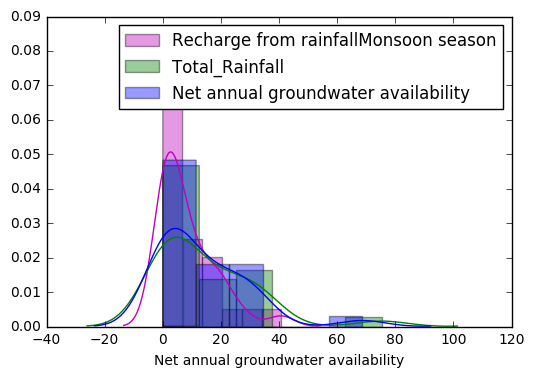

In [40]:
sb.distplot(new_data['Recharge from rainfallMonsoon season'],color='m')
sb.distplot(new_data['Total_Rainfall'],color='g')
sb.distplot(new_data['Net annual groundwater availability'])
plt.legend(['Recharge from rainfallMonsoon season','Total_Rainfall','Net annual groundwater availability'])



C:\Users\TiwariJi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


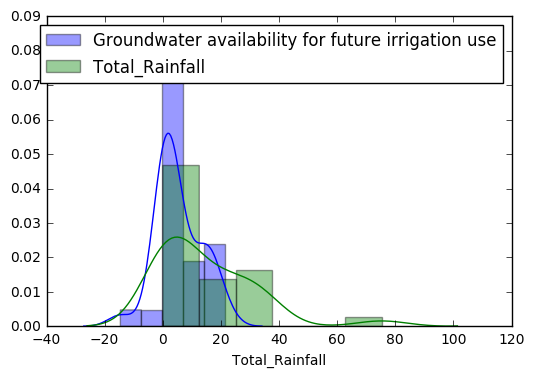

In [41]:
sb.distplot(new_data['Groundwater availability for future irrigation use'])
sb.distplot(new_data['Total_Rainfall'])
plt.legend(['Groundwater availability for future irrigation use','Total_Rainfall'])

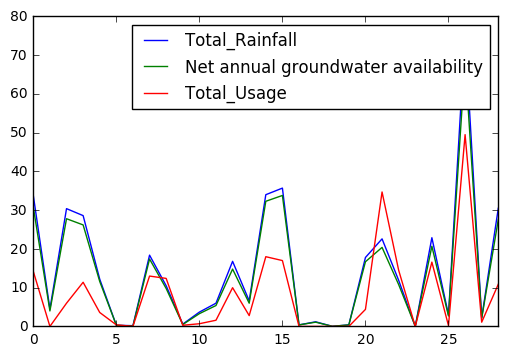

In [42]:
new_data["Total_Rainfall"].plot(kind='line')
new_data["Net annual groundwater availability"].plot()
new_data["Total_Usage"].plot()
plt.legend(['Total_Rainfall','Net annual groundwater availability','Total_Usage'])



# PREDICTING THROUGH DECISION TREE CLASSIFIER

In [43]:
from sklearn.tree import DecisionTreeClassifier


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .55, random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size = .33)

In [47]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [48]:
tree.feature_importances_

array([ 0.,  0.,  1.,  0.,  0.,  0.])

In [49]:
print("accuracy on training set: %f" % tree.score(X_train, Y_train))
print("accuracy on test set: %f" % tree.score(X_test, Y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.900000


In [50]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

print("accuracy on training set: %f" % tree.score(X_train, Y_train))
print("accuracy on test set: %f" % tree.score(X_test, Y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.900000


In [51]:
tree.feature_importances_

array([ 0.,  0.,  1.,  0.,  0.,  0.])

In [52]:
features_names = new_data.columns
features_names

Index(['States', 'Recharge from rainfallMonsoon season',
       'Recharge from other sources',
       'Recharge from rainfallNon-monsoon season',
       'Recharge from other sources.1', 'Total_Rainfall',
       'Natural discharge during non-monsoon season',
       'Net annual groundwater availability', 'Irrigation',
       'Domestic and industrial uses', 'Total_Usage',
       'Projected demand for domestic and industrial uses upto 2025',
       'Groundwater availability for future irrigation use', 'EXCESS',
       'MODERATED', 'SEMICRITICAL '],
      dtype='object')

In [53]:
import graphviz as gp

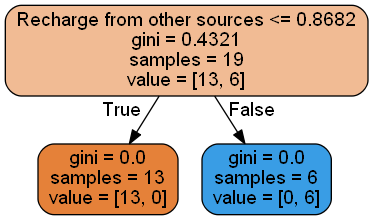

In [54]:
from IPython.display import Image 
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,feature_names=features_names,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())  

# PREDICTING THROUGH RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [56]:
X=new_data.iloc[:,[5,6,7,10,11,12]].values
y=new_data.iloc[:, 13].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=0)

In [58]:
random = RandomForestClassifier()
random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
print("accuracy on training set: %f" % random.score(X_train, y_train))
print("accuracy on test set: %f" % random.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.875000


In [60]:
random = RandomForestClassifier(max_leaf_nodes=10)
random.fit(X_train, y_train)

print("accuracy on training set: %f" % random.score(X_train, y_train))
print("accuracy on test set: %f" % random.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.937500


In [61]:
random = RandomForestClassifier(max_features='auto')
random.fit(X_train, y_train)

print("accuracy on training set: %f" % random.score(X_train, y_train))
print("accuracy on test set: %f" % random.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.937500


In [62]:
random = RandomForestClassifier(random_state=250)
random.fit(X_train, y_train)

print("accuracy on training set: %f" % random.score(X_train, y_train))
print("accuracy on test set: %f" % random.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.937500
